In [1]:
import torch
import pickle
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


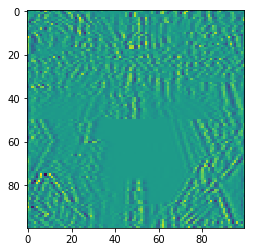

In [2]:
## 오염된 이미지(복원해야 할 이미지) 로딩 및 시각화
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p','rb'),encoding = 'latin1'))

plt.imshow(broken_image.view(100,100))

In [3]:
## 이미지를 오염 시키는 함수
### (이해할 필요 x)
def weird_function(x, n_iter = 5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:],zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

In [4]:
## 가설 텐서와 오염된 이미지 사이의 오차 계산 함수
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [5]:
## 무작위 텐서 생성과 학습률 설정
random_tensor = torch.randn(10000, dtype = torch.float)
lr = 0.8

In [6]:
## 경사하강법 구현
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor) #랜덤 텐서는 weird_function에 넣기
    loss = distance_loss(hypothesis, broken_image) #오차 계산
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr * random_tensor.grad
    if i % 1000 == 0:
        print("Loss at {} = {}".format(i, loss.item()))

Loss at 0 = 12.490422248840332
Loss at 1000 = 1.145200252532959
Loss at 2000 = 0.5380338430404663
Loss at 3000 = 0.3707628846168518
Loss at 4000 = 0.2953391969203949
Loss at 5000 = 0.24945701658725739
Loss at 6000 = 0.2161804735660553
Loss at 7000 = 0.18948163092136383
Loss at 8000 = 0.16667892038822174
Loss at 9000 = 0.14637413620948792
Loss at 10000 = 0.12775641679763794
Loss at 11000 = 0.11032647639513016
Loss at 12000 = 0.09376240521669388
Loss at 13000 = 0.07785169035196304
Loss at 14000 = 0.0624493733048439
Loss at 15000 = 0.04745415225625038
Loss at 16000 = 0.03279494121670723
Loss at 17000 = 0.021129384636878967
Loss at 18000 = 0.021164828911423683
Loss at 19000 = 0.021167179569602013


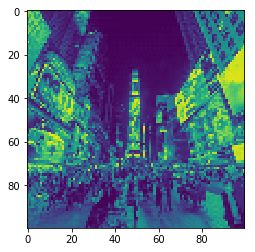

In [7]:
### 복원된 이미지 시각화
plt.imshow(random_tensor.view(100,100).data)